In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-05-20 13:09:51--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-20 13:09:51--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.001s  

2022-05-20 13:09:51 (72.6 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## Exercise 1

The goal of this exercise is to explore the effect of `diff` and `differentiate` on a signal.  Create a triangle wave and plot it.  Apply the `diff` operator and plot the result.  Compute the spectrum of the triangle wave, apply `differentiate`, and plot the result.  Convert the spectrum back to a wave and plot it.  Are there differences between the effect of `diff` and `differentiate` for this wave?

Создадим треугольную волну

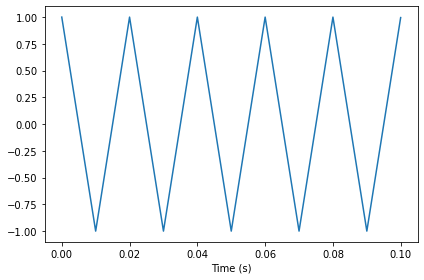

In [3]:
from thinkdsp import TriangleSignal

in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Разность треугольной волны представляет собой прямоугольную волну, что объясняет, почему гармоники в прямоугольной волне затухают

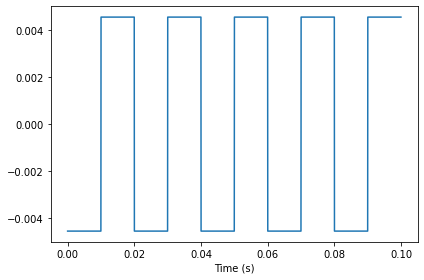

In [4]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

Когда берем спектальную производную, можно увидеть звон вокруг разрывов

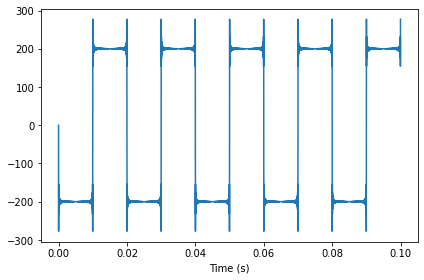

In [5]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

## Exercise 2

The goal of this exercise is to explore the effect of `cumsum` and `integrate` on a signal.  Create a square wave and plot it.  Apply the `cumsum` operator and plot the result.  Compute the spectrum of the square wave, apply `integrate`, and plot the result.  Convert the spectrum back to a wave and plot it.  Are there differences between the effect of `cumsum` and `integrate` for this wave?

Построим прямоугольную волну

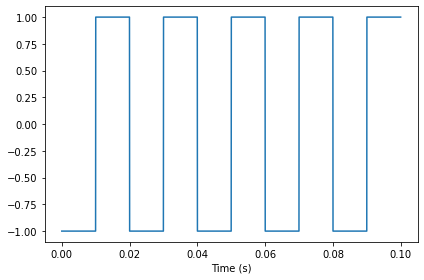

In [6]:
from thinkdsp import SquareSignal

in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Совокупная сумма прямоугольной волны представляет собой треугольную волну

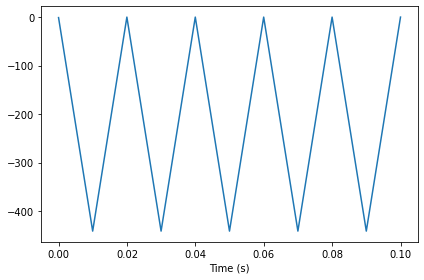

In [7]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Спектральный интеграл аналогично является треугольной волной, но с другой амплитудой

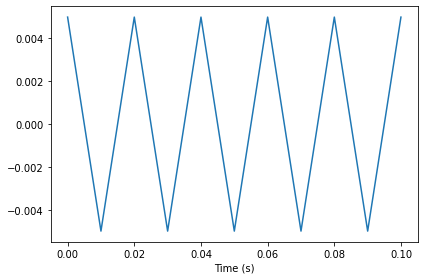

In [8]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Если нормализовать волны, то они будут похожи

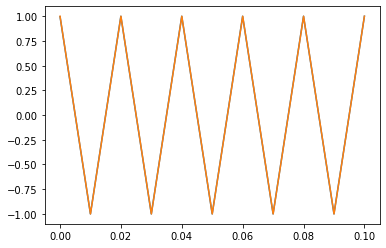

In [9]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

Они совпадают с точностью до трех цифр после запятой

In [10]:
out_wave.max_diff(out_wave2)

0.0045351473922902175

## Exercise 3

The goal of this exercise is the explore the effect of integrating twice.  Create a sawtooth wave, compute its spectrum, then apply `integrate` twice.  Plot the resulting wave and its spectrum.  What is the mathematical form of the wave?  Why does it resemble a sinusoid? 

Построим пилообразную волну

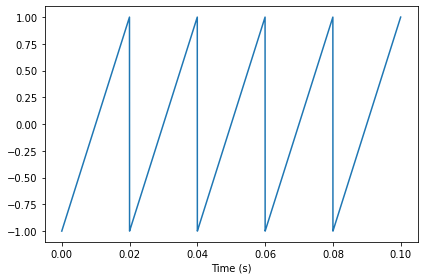

In [11]:
from thinkdsp import SawtoothSignal

in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Первая кумулятивная сумма  - парабола

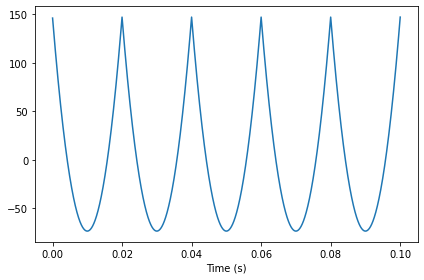

In [12]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

Вторая - кубическая парабола

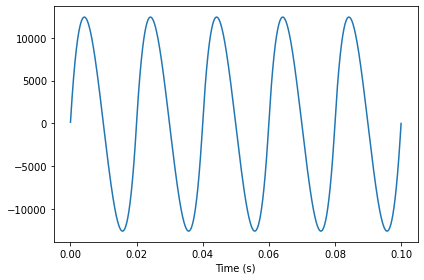

In [13]:
out_wave = out_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Дважды интегрируя получим тоже кубическую параболу

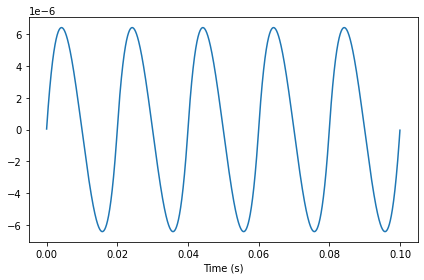

In [14]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Результат больше похож на синусоиду, т.к интегрирование действует как фильтр нижних частот, отфильтрованы почти все, кроме фундаментальных

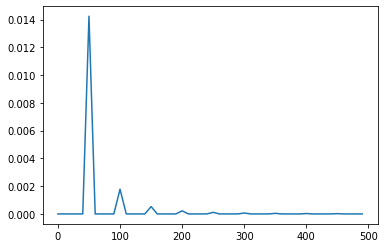

In [15]:
out_wave2.make_spectrum().plot(high=500)

## Exercise 4 

The goal of this exercise is to explore the effect of the 2nd difference and 2nd derivative.  Create a `CubicSignal`, which is defined in `thinkdsp`.  Compute the second difference by applying `diff` twice.  What does the result look like.  Compute the second derivative by applying `differentiate` twice.  Does the result look the same?

Plot the filters that corresponds to the 2nd difference and the 2nd derivative and compare them.  Hint: In order to get the filters on the same scale, use a wave with framerate 1.

Построим кубический сигнал

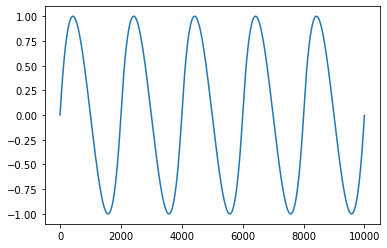

In [16]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

Первая производная - парабола

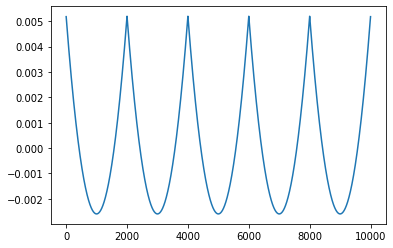

In [17]:
out_wave = in_wave.diff()
out_wave.plot()

Вторая производная - пилообразная

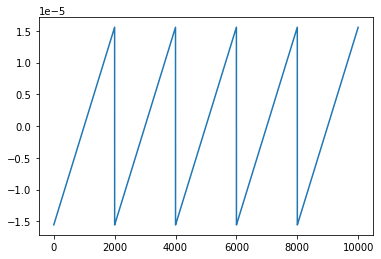

In [18]:
out_wave = out_wave.diff()
out_wave.plot()

Дважды продиференцировав получим пилообразную кривую со звонами, т.к производная неопределена в этих точках

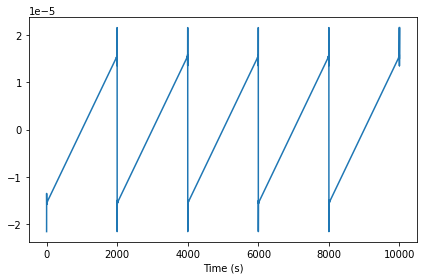

In [19]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Окно второй производной равно -1, 2, -1.

Вычислим дискретное преобразование Фурье и найдем соответствующий фильтр

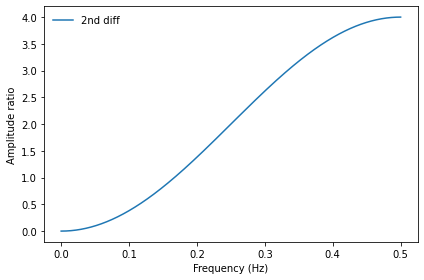

In [20]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Для второй производной мы можем найти соответствующий фильтр, вычислив фильтр первой производной и возведя его в квадрат.

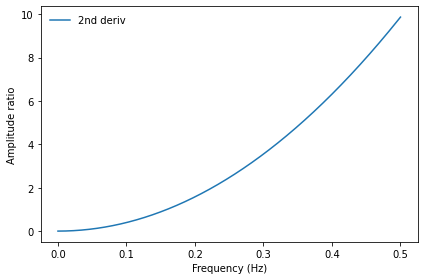

In [21]:
PI2 = np.pi * 2

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Два фильтра на одном масштабе:

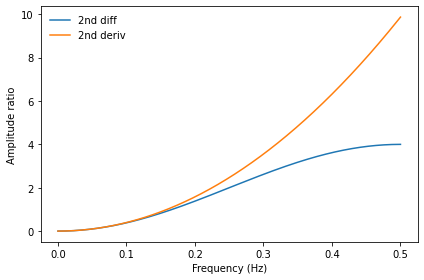

In [22]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Оба являются фильтрами верхних частот, которые усиливают высокочастотные компоненты. Вторая производная является параболической, поэтому она больше всего усиливает самые высокие частоты.

2-я разность является хорошей аппроксимацией 2-й производной только на самых низких частотах